In [3]:
from create_dataset import PlanktonDataset
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline

In [26]:
csv_filename = '/data4/plankton_wi17/mpl/source_domain/spcbench/bench_data/V1b/{}.csv'
img_dir = '/data5/Plankton_wi18/rawcolor_db2/images/'                         
phases = ['train', 'valid', 'test']                                           
datasets = {phase: PlanktonDataset(csv_filename = csv_filename.format(phase), 
                                   img_dir = img_dir,                         
                                   phase = phase) for phase in phases}        

In [28]:
datasets['train'].data

,Unnamed: 0,specimen_id,order,family,genus,label,images,phase
0,0,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955833-000115-001-11...,train
1,1,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955833-000116-001-35...,train
2,2,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955834-000117-001-30...,train
3,3,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955834-000120-001-56...,train
4,4,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955841-000167-001-57...,train
5,5,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955841-000168-001-57...,train
6,6,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955841-000171-001-56...,train
7,7,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955844-000193-001-20...,train
8,8,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955845-000196-001-0-...,train
9,9,20170120_002,Amphipoda,Gammaridae,Gammaridae (Family),1,20170120_002/SPCBench-1484955845-000197-001-0-...,train


## Copepod Classes

In [29]:
sortCopepod = False
if sortCopepod:
    columnToSort = 'order'
else:
    columnToSort = 'label'

df = datasets['train'].data
specimen_to_img = df['images'].groupby(df['specimen_id']).apply(list).to_dict()
classes_to_specimen = df['specimen_id'].groupby(df[columnToSort]).apply(list).to_dict()
classes_to_specimen = {classes:set(classes_to_specimen[classes]) for classes in classes_to_specimen}

if sortCopepod:
    copepodClasses = ['Calanoida', 'Cyclopoida']
    classes_to_specimen = {copepod:classes_to_specimen[copepod] for copepod in copepodClasses}

dataset = {}
for classes in classes_to_specimen:
    dataset[classes] = {spc: specimen_to_img[spc] for spc in classes_to_specimen[classes]}

In [23]:
dataset.keys()

[0, 1]

=> 2. 1: Train 60


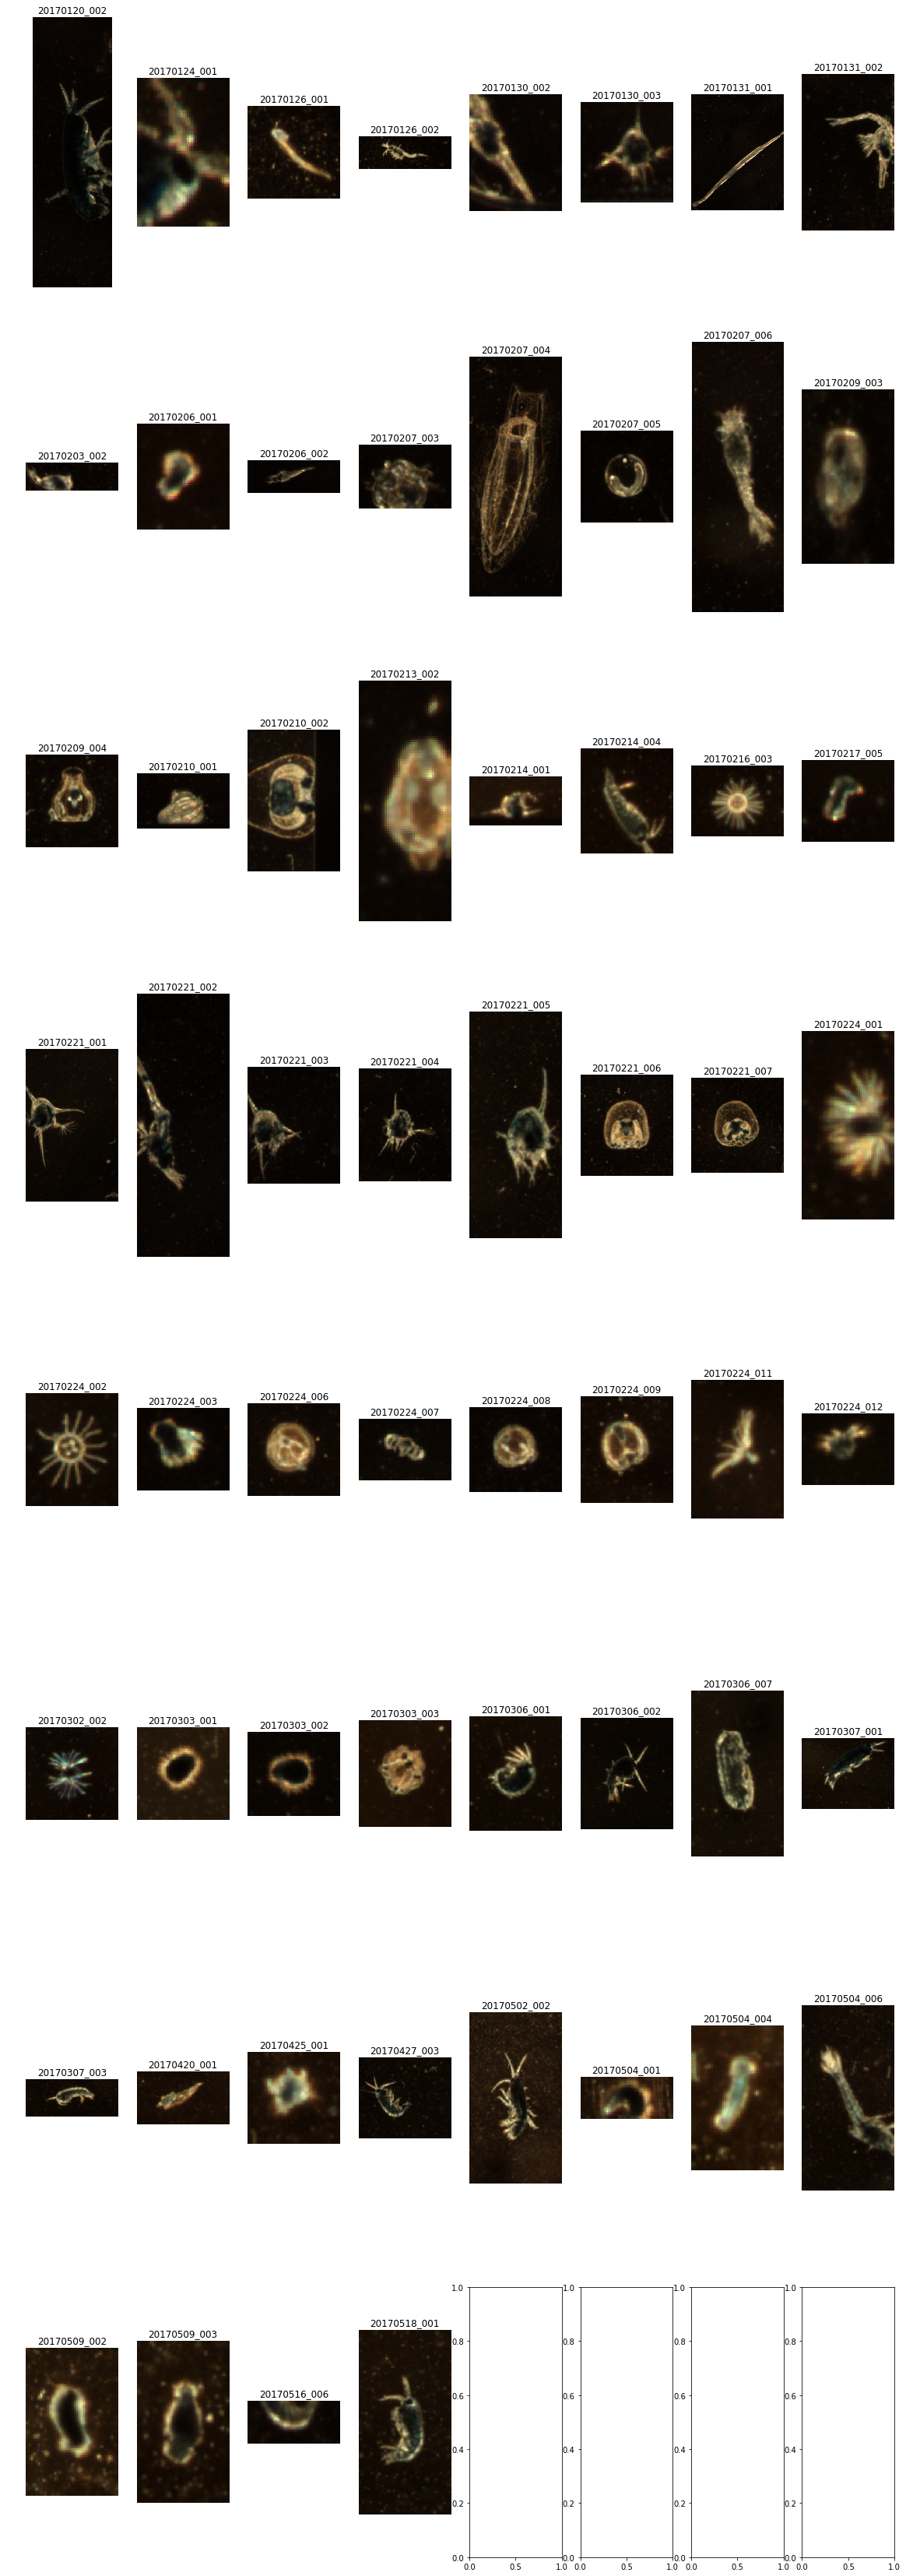

In [32]:
img_dir = '/data5/Plankton_wi18/rawcolor_db2/images'
numCols = 8
for i, cls in enumerate(dataset):
    if i==0:
        continue
    print('=> {}. {}: Train {}'.format(i+1, cls, len(dataset[cls])))
    fig, axarr = plt.subplots(max(len(dataset[cls])/numCols+1,2), numCols, figsize=(20,60))
    for j,spc in enumerate(sorted(dataset[cls])):
        idx = np.random.choice(dataset[cls][spc])
        img = plt.imread(os.path.join(img_dir, idx))
        axarr[j / numCols, j % numCols].imshow(img)
        axarr[j / numCols, j % numCols].set_axis_off()
        axarr[j / numCols, j % numCols].set_title('{}'.format(spc), fontsize=12)
        if j > 70:
            break
    plt.show()

## Visualize  Misclassified Classes

In [71]:
root = '/data4/plankton_wi17/mpl/target_domain'
predictionFile = root + '/spcbench/bench_finetune/exp4/Image_preds.txt'
predsDF = pd.read_csv(predictionFile, sep=' ', names=['prob1', 'prob2', 'pred'])
predsDF = predsDF.drop(columns=['prob1', 'prob2'])

gtruthFile = root + '/aspect_target_image_path_labels.txt'
gtruthDF = pd.read_csv(gtruthFile, sep=';', names=['path', 'id', 'gtruth'])
df = pd.concat([gtruthDF, predsDF], axis=1)

In [75]:
true_positive = df['path'][(df['gtruth'] == 0) & (df['pred'] == 0)].tolist()
true_negative = df['path'][(df['gtruth'] == 1) & (df['pred'] == 1)].tolist()
false_positive = df['path'][(df['gtruth'] == 0) & (df['pred'] == 1)].tolist()
false_negative = df['path'][(df['gtruth'] == 1) & (df['pred'] == 0)].tolist()

Total count: 1821 images, displaying 100 random images


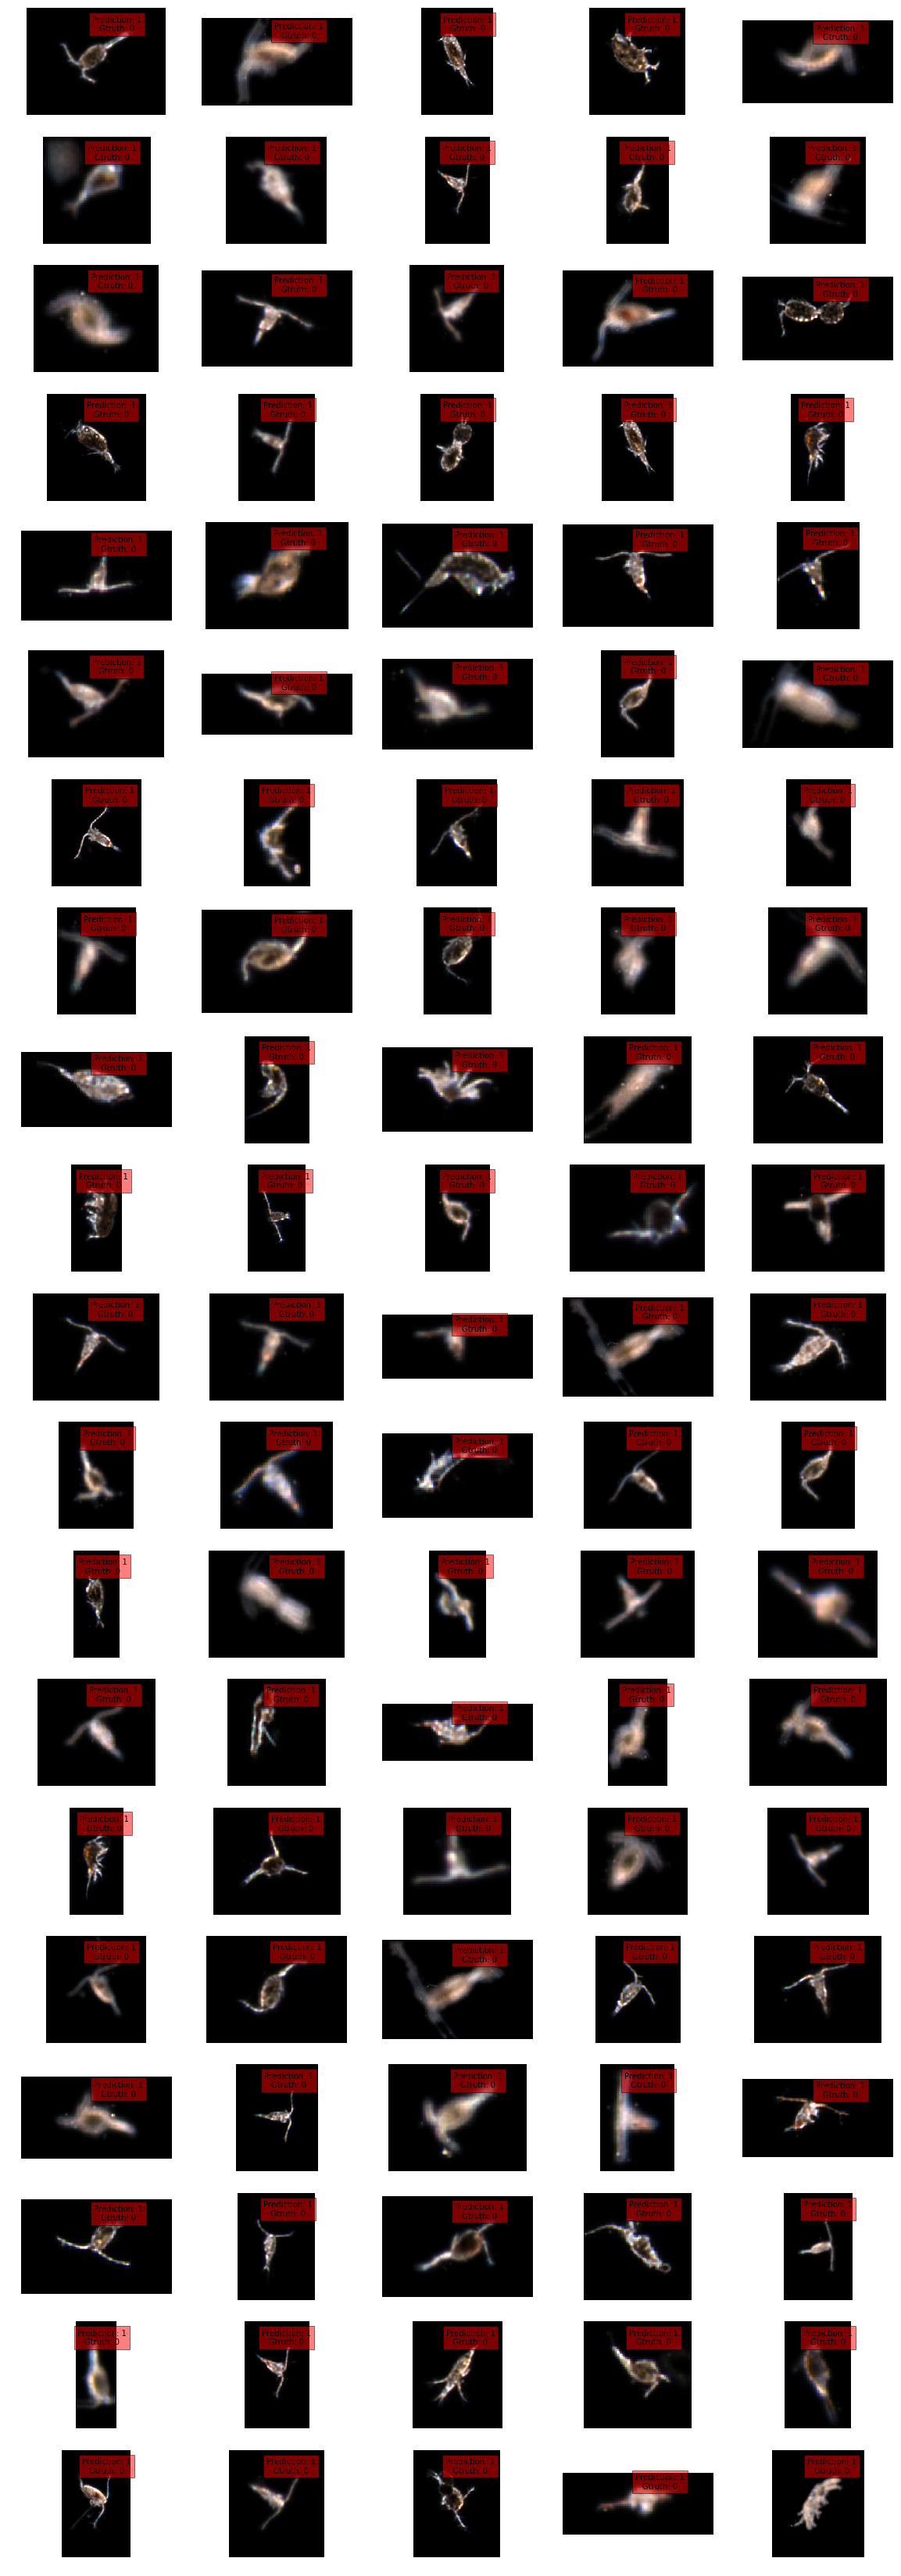

In [77]:
numRows = 20
numCols = 5
imgList = false_positive
print 'Total count: {} images, displaying {} random images'.format(len(imgList), numRows*numCols)
gtruth, pred = 0, 1
fig, axarr = plt.subplots(numRows, numCols, figsize=(20, 60))
for i in range(numRows):
    for j in range(numCols):
        img = plt.imread(np.random.choice(imgList))
        axarr[i,j].imshow(img)
        axarr[i,j].set_axis_off()
        axarr[i,j].text(0.65, 0.85, 'Prediction: {}\nGtruth: {}'.format(pred, gtruth), bbox=dict(facecolor='red', alpha=0.5),
        horizontalalignment='center', verticalalignment='center', transform=axarr[i,j].transAxes)
plt.show()